In [2]:
import numpy as np
import pandas as pd
from sklearn import feature_extraction, linear_model, model_selection
from nltk.corpus import stopwords
stop=set(stopwords.words('english'))
from collections import  Counter
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

In [3]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [4]:
print(train_df.shape)
print(test_df.shape)

(7613, 5)
(3263, 4)


In [5]:
train_df.iloc[40]

id                                                         59
keyword                                                ablaze
location                                       Live On Webcam
text        Check these out: http://t.co/rOI2NSmEJJ http:/...
target                                                      0
Name: 40, dtype: object

# Data Analysis

1) will see is there a correlation between "keywords" and "target"

In [6]:
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [7]:
keywords = train_df.dropna(subset=['keyword'])
keywords['keyword'].value_counts()

fatalities               45
deluge                   42
armageddon               42
damage                   41
body%20bags              41
                         ..
forest%20fire            19
epicentre                12
threat                   11
inundation               10
radiation%20emergency     9
Name: keyword, Length: 221, dtype: int64

there are 221 label of keywords. Make LabelEncoder to get the numeric feature "keyword_encoded" which value will be from 0 to 220

In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
labelencoder = LabelEncoder()

In [10]:
keywords['keyword_encoded'] = labelencoder.fit_transform(keywords['keyword'])

/Users/karinahanova/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [11]:
keywords.head()

,id,keyword,location,text,target,keyword_encoded
31,48,ablaze,Birmingham,@bbcmtd Wholesale Markets ablaze http://t.co/l...,1,0
32,49,ablaze,Est. September 2012 - Bristol,We always try to bring the heavy. #metal #RT h...,0,0
33,50,ablaze,AFRICA,#AFRICANBAZE: Breaking news:Nigeria flag set a...,1,0
34,52,ablaze,"Philadelphia, PA",Crying out for more! Set me ablaze,0,0
35,53,ablaze,"London, UK",On plus side LOOK AT THE SKY LAST NIGHT IT WAS...,0,0


array([<matplotlib.axes._subplots.AxesSubplot object at 0x11a3a77b8>],
      dtype=object)

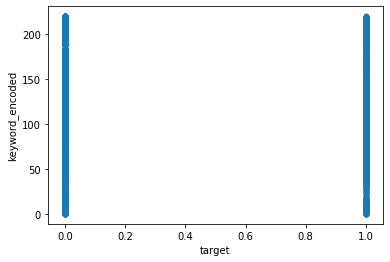

In [12]:
keywords.plot('target','keyword_encoded',subplots=True,kind="scatter")

In [13]:
print('Correlation between "keywords" and "target" = ', keywords.iloc[:,-1].corr(keywords.iloc[:,-2]))

Correlation between "keywords" and "target" =  0.05584067388432151


### t-SNE for keywords

In [14]:
X = keywords['keyword_encoded']
y = keywords['target']

tsne_keyword = TSNE(n_components=2,random_state=1).fit_transform(X.values.reshape(-1,1))

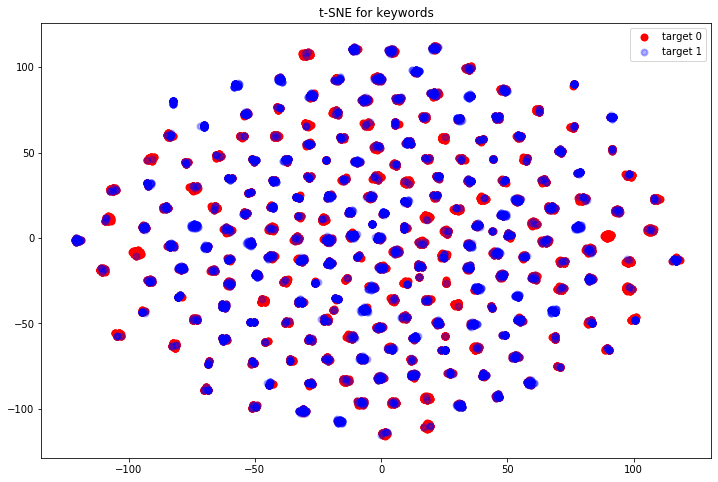

In [15]:
fig = plt.figure(figsize=(12, 8))
plt.scatter(tsne_keyword[y==0,0],tsne_keyword[y==0,1], c = 'r', label = 'target 0', linewidth = 2)
plt.scatter(tsne_keyword[y==1,0],tsne_keyword[y==1,1], c = 'b', label = 'target 1',linewidth = 2,alpha= 0.3)
plt.legend()
plt.title('t-SNE for keywords')
plt.show()

2) will see is there a correlation between "locations" and "target"

In [16]:
locations = train_df.dropna(subset=['location'])

In [17]:
locations['location'].value_counts()

USA                              104
New York                          71
United States                     50
London                            45
Canada                            29
                                ... 
Gumptown                           1
Menasha, WI                        1
Wild Wild Web                      1
Light and dark, form and void      1
 Nxgerxa                           1
Name: location, Length: 3341, dtype: int64

In [18]:
locations['location_encoded'] = labelencoder.fit_transform(locations['location'])

/Users/karinahanova/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [19]:
locations.head()

,id,keyword,location,text,target,location_encoded
31,48,ablaze,Birmingham,@bbcmtd Wholesale Markets ablaze http://t.co/l...,1,453
32,49,ablaze,Est. September 2012 - Bristol,We always try to bring the heavy. #metal #RT h...,0,922
33,50,ablaze,AFRICA,#AFRICANBAZE: Breaking news:Nigeria flag set a...,1,209
34,52,ablaze,"Philadelphia, PA",Crying out for more! Set me ablaze,0,2054
35,53,ablaze,"London, UK",On plus side LOOK AT THE SKY LAST NIGHT IT WAS...,0,1516


array([<matplotlib.axes._subplots.AxesSubplot object at 0x108ee01d0>],
      dtype=object)

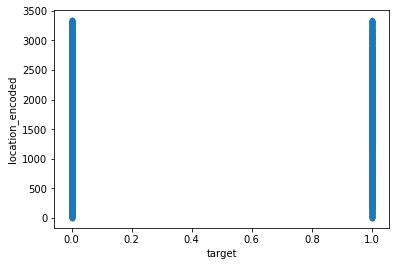

In [20]:
locations.plot('target','location_encoded',subplots=True,kind="scatter")

In [21]:
print('Correlation between "location" and "target" = ',locations.iloc[:,-1].corr(locations.iloc[:,-2]))

Correlation between "location" and "target" =  0.004339450214883017


### t-SNE for location

In [22]:
X = locations['location_encoded']
y = locations['target']
tsne = TSNE(n_components=2, random_state=1).fit_transform(X.values.reshape(-1,1))

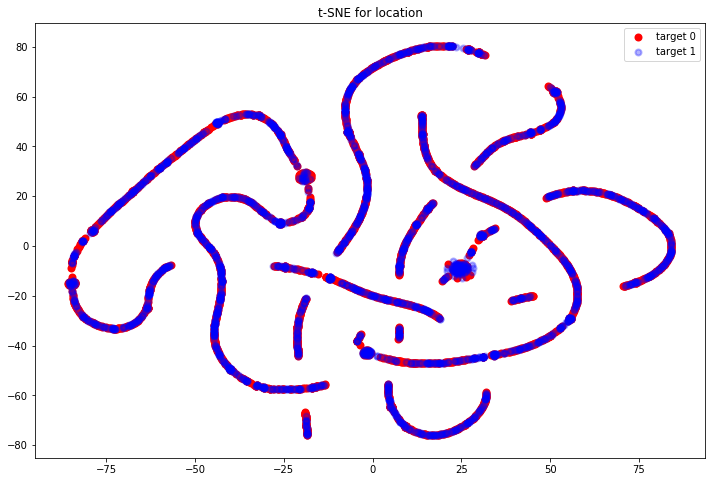

In [23]:
fig = plt.figure(figsize=(12, 8))
plt.scatter(tsne[y==0,0],tsne[y==0,1], c = 'r', label = 'target 0', linewidth = 2)
plt.scatter(tsne[y==1,0],tsne[y==1,1], c = 'b', label = 'target 1',linewidth = 2,alpha= 0.3)
plt.legend()
plt.title('t-SNE for location')
plt.show()

# Analysis of common words

In [24]:
from collections import defaultdict
import matplotlib.pyplot as plt

In [25]:
def create_corpus(target):
    
    corpus = []
    
    for tweet in train_df[train_df['target'] == target]['text'].str.split():
        for word in tweet:
            corpus.append(word)
    
    return corpus

In [26]:
corpus_0 = create_corpus(0)
corpus_1 = create_corpus(1)

print(len(corpus_0))
print(len(corpus_1))

63848
49613


### The most common stopwords in tweets

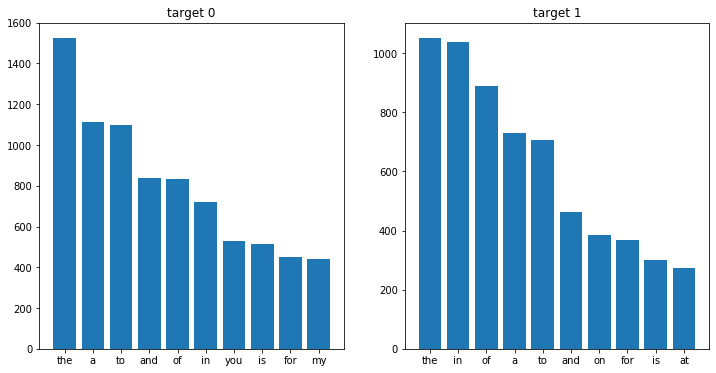

In [27]:
dic_0 = defaultdict(int)
dic_1 = defaultdict(int)

for word in corpus_0:
    if word in stop:
        dic_0[word] += 1
        
for word in corpus_1:
    if word in stop:
        dic_1[word] += 1
        
top_0=sorted(dic_0.items(), key=lambda x:x[1],reverse=True)[:10] 
top_1=sorted(dic_1.items(), key=lambda x:x[1],reverse=True)[:10] 


# graphs
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
for top, ax, no in zip([top_0,top_1], axes, [0,1]):
    
    x,y = zip(*top)
    ax.bar(x,y)
    ax.set_title('target {}'.format(no))
    


### Common words

In [28]:
import seaborn as sns

Text(0.5, 1.0, 'target 0')

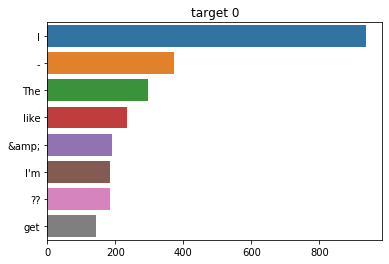

In [29]:
counter_0 = Counter(corpus_0)
most_0 = counter_0.most_common()


x_0 = []
y_0 = []
for word,count in most_0[:40]:
    if (word not in stop):
        x_0.append(word)
        y_0.append(count)
sns.barplot(x = y_0, y = x_0).set_title('target 0')

Text(0.5, 1.0, 'target 1')

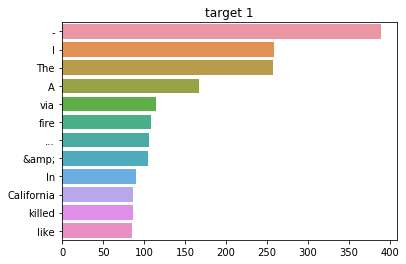

In [30]:
counter_1 = Counter(corpus_1)
most_1 = counter_1.most_common()


x_1 = []
y_1 = []
for word,count in most_1[:40]:
    if (word not in stop):
        x_1.append(word)
        y_1.append(count)
sns.barplot(x = y_1, y = x_1).set_title('target 1')


## Make the first model

In [31]:
count_vectorizer = feature_extraction.text.CountVectorizer()

In [32]:
train_vectors = count_vectorizer.fit_transform(train_df['text'])
test_vectors = count_vectorizer.transform(test_df['text'])

In [33]:
clf = linear_model.RidgeClassifier()

In [34]:
scores = model_selection.cross_val_score(clf, train_vectors, train_df['target'], cv = 3, scoring= 'f1')
print(np.mean(scores))

0.6001146207285265


In [35]:
clf.fit(train_vectors, train_df['target'])

RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=False, random_state=None,
                solver='auto', tol=0.001)

In [36]:
sample_submission = pd.read_csv('sample_submission.csv')

In [541]:
#sample_submission.shape

(3263, 2)

In [542]:
#sample_submission['target'] = clf.predict(test_vectors)

In [543]:
#sample_submission.head()

,id,target
0,0,0
1,2,1
2,3,1
3,9,0
4,11,1


In [544]:
#sample_submission.to_csv('answer.csv', index= False)

## 1st submission = scored 0.77096

# Data Cleaning

## Remove URL

In [37]:
import re
def remove_URL(text):
    
    url = re.compile(r'https?://\S+|www\.\S+')
    
    return url.sub(r'',text)

In [38]:
train_df['text'] = train_df['text'].apply(lambda x:  remove_URL(x))
test_df['text'] = test_df['text'].apply(lambda x:  remove_URL(x))

In [39]:
train_df.iloc[40]

id                                  59
keyword                         ablaze
location                Live On Webcam
text        Check these out:     #nsfw
target                               0
Name: 40, dtype: object

## Remove HTML tags

In [40]:
def remove_HTML(text):
    url = re.compile(r'<.*?>')
    return url.sub(r'',text)

In [41]:
train_df['text'] = train_df['text'].apply(lambda x:  remove_HTML(x))
test_df['text'] = test_df['text'].apply(lambda x:  remove_HTML(x))

## Remove emoji

In [42]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [43]:
train_df['text'] = train_df['text'].apply(lambda x:  remove_emoji(x))
test_df['text'] = test_df['text'].apply(lambda x:  remove_emoji(x))

## Remove punctuations

In [44]:
import string

In [45]:
def remove_punct(text):
    table = str.maketrans('','',string.punctuation)
    
    return text.translate(table)

In [46]:
train_df['text'] = train_df['text'].apply(lambda x:  remove_punct(x))
test_df['text'] = test_df['text'].apply(lambda x:  remove_punct(x))

In [47]:
train_df.iloc[40]

id                                59
keyword                       ablaze
location              Live On Webcam
text        Check these out     nsfw
target                             0
Name: 40, dtype: object

## Create model after data cleaninig

In [48]:
count_vectorizer = feature_extraction.text.CountVectorizer()
train_vectors = count_vectorizer.fit_transform(train_df['text'])
test_vectors = count_vectorizer.transform(test_df['text'])
clf = linear_model.RidgeClassifier()
scores = model_selection.cross_val_score(clf, train_vectors, train_df['target'], cv = 3, scoring= 'f1')
print(np.mean(scores))

0.5938792492728527


In [49]:
clf.fit(train_vectors, train_df['target'])

RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=False, random_state=None,
                solver='auto', tol=0.001)

In [558]:
#sample_submission = pd.read_csv('sample_submission.csv')

In [559]:
#sample_submission['target'] = clf.predict(test_vectors)

In [560]:
#sample_submission.to_csv('answer.csv', index= False)

## 2nd submission: after data cleaning my submission scored 0.77096, which is not an improvement of my best score.

# Tunning thresholds

In [54]:
print(train_vectors.shape)
print(train_df['target'].shape)
print(test_vectors.shape)


(7613, 17798)
(7613,)
(3263, 17798)


In [58]:
X_train = train_vectors
y_train = train_df['target']

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve, classification_report, f1_score

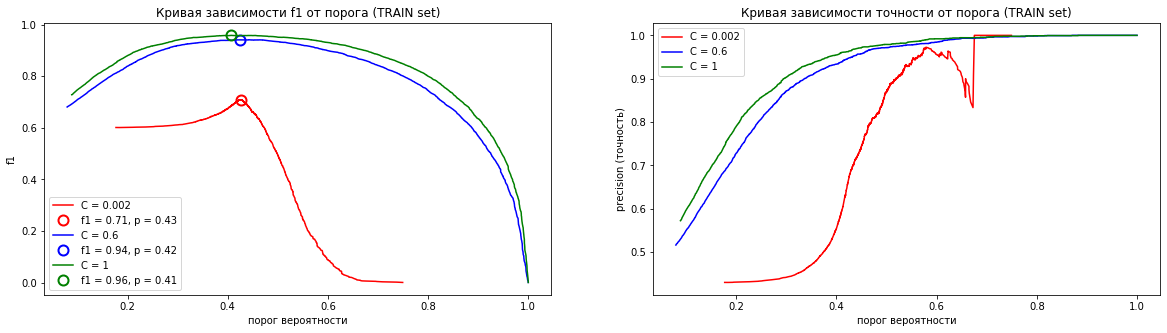

In [67]:
fig, axes = plt.subplots(1, 2, figsize=(20, 5)) 

for c, col in zip([0.002, 0.6, 1], ['r','b','g']):
    log_reg = LogisticRegression(C = c,max_iter = 20000).fit(X_train,y_train)
    
    precision_train, recall_train, tresholds_train = precision_recall_curve(y_train, 
                                                                            log_reg.predict_proba(X_train)[:,1])
    
    f_scores_train = []
    for t in tresholds_train:
        y_pred_change_threshold_train = log_reg.predict_proba(X_train) >= t
        f_scores_train.append(f1_score(y_train,y_pred_change_threshold_train[:,1]))   
        
    max_f1_train = np.argmax(np.abs(f_scores_train))
    
    axes[0].plot(tresholds_train, f_scores_train, label = 'C = {}'.format(c), c = col)
    axes[0].plot(tresholds_train[max_f1_train], f_scores_train[max_f1_train],'o', markersize=10, 
             label="f1 = {:.2f}, p = {:.2f}".format(f_scores_train[max_f1_train],tresholds_train[max_f1_train]), 
             fillstyle="none",mew=2, c = col)
    
    axes[0].set_title('Кривая зависимости f1 от порога (TRAIN set)')
    axes[0].set_xlabel('порог вероятности')
    axes[0].set_ylabel('f1')
    axes[0].legend(loc = 'best') 
    
    max_precision_train = np.argmax(np.abs(precision_train))
    
    axes[1].plot(tresholds_train, precision_train[:-1], label = 'C = {}'.format(c), c = col)
   
    axes[1].set_title('Кривая зависимости точности от порога (TRAIN set)' )
    axes[1].set_xlabel('порог вероятности')
    axes[1].set_ylabel('precision (точность)')
    axes[1].legend(loc = 'best')   

plt.show()

In [68]:
clf = LogisticRegression(C = 1)

scores = model_selection.cross_val_score(clf, train_vectors, train_df['target'], cv = 3, scoring= 'f1')
print(np.mean(scores))

0.6328816993014413


In [82]:
clf.fit(train_vectors, train_df['target'])
THRESHOLD = 0.41
preds = np.where(clf.predict_proba(test_vectors)[:,1] > THRESHOLD, 1, 0)

/Users/karinahanova/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [74]:
preds

array([1, 1, 1, ..., 1, 1, 1])

In [76]:
sample_submission = pd.read_csv('sample_submission.csv')
sample_submission['target'] = np.where(clf.predict_proba(test_vectors)[:,1] > THRESHOLD, 1, 0)
sample_submission.to_csv('answer.csv', index= False)

## 3d submission after changing threshold value: = 0.57055